In [85]:
import pandas as pd
uselog = pd.read_csv("/Users/mrmmm/OneDrive/100knock-data_analytics/3章/use_log.csv")
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [86]:
customer = pd.read_csv("/Users/mrmmm/OneDrive/100knock-data_analytics/3章/customer_master.csv")
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [87]:
campaign = pd.read_csv("/Users/mrmmm/OneDrive/100knock-data_analytics/3章/campaign_master.csv")
print(len(campaign))
campaign.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [88]:
class_mus = pd.read_csv("/Users/mrmmm/OneDrive/100knock-data_analytics/3章/class_master.csv")
print(len(class_mus))
class_mus.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [89]:
customer_join = pd.merge(customer, class_mus, on="class", how="left")
customer_join = pd.merge(customer_join, campaign, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [90]:
print(len(customer))

4192


In [91]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [92]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [93]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [94]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [95]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [96]:
customer_join.groupby(["is_deleted","campaign_name"]).count()["customer_id"]

is_deleted  campaign_name
0           入会費半額             282
            入会費無料             219
            通常               2341
1           入会費半額             368
            入会費無料             273
            通常                709
Name: customer_id, dtype: int64

In [97]:
customer_join.groupby(["is_deleted","gender"]).count()["customer_id"]

is_deleted  gender
0           F         1352
            M         1490
1           F          631
            M          719
Name: customer_id, dtype: int64

In [98]:
customer_join.groupby(["class_name","is_deleted"]).count()["customer_id"]

class_name  is_deleted
オールタイム      0             1381
            1              664
デイタイム       0              675
            1              344
ナイト         0              786
            1              342
Name: customer_id, dtype: int64

In [99]:
customer_join.groupby(["gender","class_name"]).count()["customer_id"]

gender  class_name
F       オールタイム         822
        デイタイム          835
        ナイト            326
M       オールタイム        1223
        デイタイム          184
        ナイト            802
Name: customer_id, dtype: int64

In [100]:
#キャンペーンと解約は関係がありそう
#クラスと解約は関係なさそう

In [101]:
#入会人数は2018年㋃1日から2019年3月31日まで

In [102]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [103]:
customer_start

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,ナイト,6000,入会費無料
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,デイタイム,7500,入会費無料
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,オールタイム,10500,入会費無料
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常


In [104]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [105]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [106]:
#顧客データはここまで
#得られたのはキャンペーンと解約には関係がありそうだということ
#この後は利用履歴

In [107]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [108]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [109]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [110]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max([["customer_id", "count"]])
uselog_weekday["routine_flag"] = 0
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,weekday,count,routine_flag
0,AS002855,6,5,1
1,AS008805,6,4,1
2,AS009013,0,2,0
3,AS009373,6,5,1
4,AS015233,6,5,1


In [111]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flag"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [112]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flag        0
dtype: int64

In [113]:
customer_join.groupby("routine_flag").count()["customer_id"]

routine_flag
0     779
1    3413
Name: customer_id, dtype: int64

In [114]:
customer_join.groupby(["routine_flag", "end_date"]).count()["customer_id"]

routine_flag  end_date  
0             2018-04-30    119
              2018-05-31     98
              2018-06-30     81
              2018-07-31     78
              2018-08-31     70
              2018-09-30     59
              2018-10-31     45
              2018-11-30     38
              2018-12-31     38
              2019-01-31     38
              2019-02-28     41
              2019-03-31     29
1             2018-04-30      2
              2018-05-31     27
              2018-06-30     25
              2018-07-31     24
              2018-08-31     43
              2018-09-30     45
              2018-10-31     45
              2018-11-30     51
              2018-12-31     73
              2019-01-31     91
              2019-02-28    108
              2019-03-31     82
Name: customer_id, dtype: int64

In [115]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190420"))
customer_join["membership_period"] = 0
for i in  range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join.loc[i, "membership_period"] = delta.years*12 + delta.months
    
customer_join.head() 

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-20,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-20,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-20,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-20,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-20,47


In [116]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [117]:
customer_join.groupby("end_date").count()["customer_id"]

end_date
2018-04-30    121
2018-05-31    125
2018-06-30    106
2018-07-31    102
2018-08-31    113
2018-09-30    104
2018-10-31     90
2018-11-30     89
2018-12-31    111
2019-01-31    129
2019-02-28    149
2019-03-31    111
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

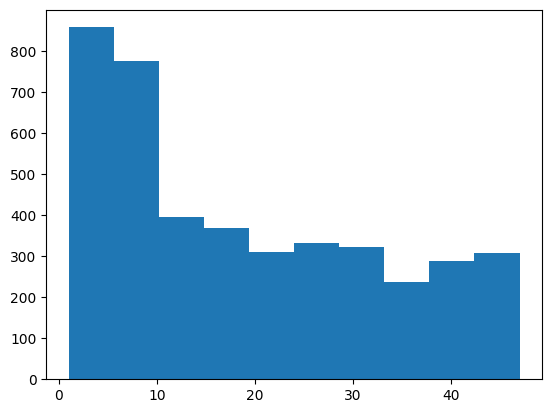

In [118]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [119]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [120]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [121]:
customer_clustering = customer_join[["mean", "median", "max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [122]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

Kmeans = KMeans(n_clusters=4, random_state=0)
clusters = Kmeans.fit(customer_clustering_sc)
customer_clustering = customer_clustering.assign(cluster = clusters.labels_)
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [123]:
customer_clustering.columns = ["月内平均値","月内中央値","月内最大値","月内最小値","会員期間","cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [124]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


In [125]:
#次元削除（主成分分析）
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

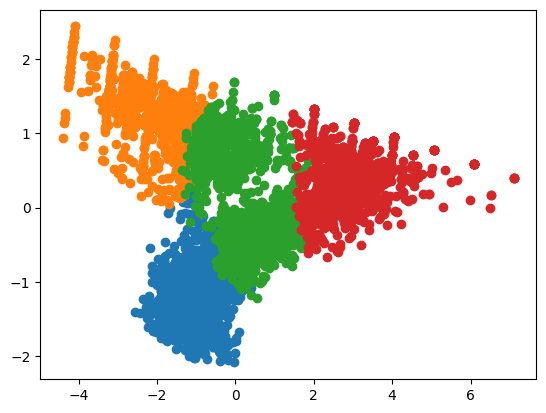

In [126]:
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [127]:
customer_clustering = pd.concat([customer_clustering, customer_join], axis=1)
customer_clustering.groupby(["cluster", "is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [128]:
customer_clustering.groupby(["cluster","routine_flag"],as_index=False).count()[["cluster","routine_flag","customer_id"]]

,cluster,routine_flag,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


In [129]:
#翌月の利用回数予測
uselog = pd.read_csv("/Users/mrmmm/OneDrive/100knock-data_analytics/3章/use_log.csv")
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"},inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [130]:
year_months = list(uselog_months["年月"].unique())

In [131]:
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]].copy()
    tmp.rename(columns={"count":"count_pred"},inplace=True)
    for j in range(1,7):
        tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-j]].copy()
        del tmp_before["年月"]
        tmp_before.rename(columns={"count":"count_{}".format(j-1)},inplace=True)
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
        
    predict_data = pd.concat([predict_data, tmp],ignore_index=True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [132]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [133]:
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01 00:00:00
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01 00:00:00
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01 00:00:00
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01 00:00:00
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01 00:00:00


In [134]:
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
from dateutil.relativedelta import relativedelta
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i,"now_date"], predict_data.loc[i,"start_date"])
    predict_data.loc[i,"period"] = delta.years*12 + delta.months
    
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12.0


In [135]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]
score = []
from sklearn import linear_model
import sklearn.model_selection
import numpy
import statistics

model = linear_model.LinearRegression()
X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period"]]
Y = predict_data["count_pred"]
skf = sklearn.model_selection.StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, Y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    model.fit(X_train, Y_train)
    score.append(model.score(X_test,Y_test))
    
print(statistics.mean(score))

0.5849760192890023


In [136]:
predict_data = pd.merge(predict_data, customer_join[["customer_id","routine_flag"]], on="customer_id", how="left")

In [137]:
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period,routine_flag
0,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5.0,0
1,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5.0,1
2,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5.0,1
3,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5.0,1
4,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5.0,0


In [138]:
score = []
from sklearn import linear_model
import sklearn.model_selection
import numpy
import statistics

model = linear_model.LinearRegression()
X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period", "routine_flag"]]
Y = predict_data["count_pred"]
skf = sklearn.model_selection.StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, Y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    model.fit(X_train, Y_train)
    score.append(model.score(X_test,Y_test))
    
print(statistics.mean(score))

0.5848359727478187


In [139]:
coef = pd.DataFrame({"feature_name":X.columns, "coefficient":model.coef_})
coef

,feature_name,coefficient
0,count_0,0.350802
1,count_1,0.207418
2,count_2,0.157194
3,count_3,0.150451
4,count_4,0.102550
5,count_5,0.032223
6,period,0.231629
7,routine_flag,0.568217


In [140]:
#顧客の行動パターンを分析し、来月の利用予測のモデルを作成しました。
#次は顧客の退会を予測します。

In [141]:
years_months = list(uselog_months["年月"].unique())
uselog = pd.DataFrame()
for i in range(1, len(years_months)):
    tmp = uselog_months.loc[uselog_months["年月"]==years_months[i]].copy()
    tmp.rename(columns={"count":"count_0"}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]].copy()
    del tmp_before["年月"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True)
    
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [150]:
from dateutil.relativedelta import relativedelta
exit_customer = customer_join.loc[customer_join["is_deleted"]==1].copy()
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
for i in exit_customer.index:
    exit_customer.loc[i, "exit_date"] = exit_customer.loc[i, "end_date"] - relativedelta(months=1)
exit_customer["exit_date"] = pd.to_datetime(exit_customer["exit_date"])
exit_customer["年月"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on =["customer_id", "年月"], how="left")
print(len(uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [151]:
customer_join[customer_join["is_deleted"]==1]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,3.0,3.0,3,3,0,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,デイタイム,7500,通常,3.0,3.0,3,3,0,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,1.0,1.0,1,1,0,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,ナイト,6000,通常,3.5,3.5,4,3,1,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,オールタイム,10500,通常,3.0,3.0,3,3,0,2018-05-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,ナイト,6000,通常,4.5,4.5,6,3,0,2019-02-28,1
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,オールタイム,10500,通常,7.0,6.0,12,3,0,2019-03-31,2
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,デイタイム,7500,通常,7.0,7.0,11,3,0,2019-03-31,1
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,ナイト,6000,通常,7.0,7.0,10,4,0,2019-03-31,1


In [152]:
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [153]:
conti_customer = customer_join.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [154]:
conti_uselog = conti_uselog.sample(frac=1, random_state=0).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-20,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,オールタイム,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-20,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,オールタイム,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-20,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,ナイト,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-20,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,オールタイム,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-20,19.0


In [155]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-20,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-20,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-20,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-20,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-20,19.0,NaT


In [159]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i, "now_date"], predict_data.loc[i, "start_date"])
    predict_data.loc[i, "period"] = int(delta.years*12 + delta.months)
    
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-20,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-20,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-20,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-20,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-20,19.0,NaT,8,2018-05-01


In [160]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flag            0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [162]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flag            0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [163]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flag", "period", "is_deleted"]
predict_data = preditc_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flag,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,0,0.0
1,通常,オールタイム,M,5.0,1.0,9,0.0
2,通常,オールタイム,M,4.0,1.0,15,0.0
3,通常,ナイト,M,6.0,1.0,3,0.0
4,通常,オールタイム,M,7.0,1.0,8,0.0


In [164]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flag,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,1,0,0,1,0,0,0,1
1,5.0,1.0,9,0.0,0,0,1,1,0,0,0,1
2,4.0,1.0,15,0.0,0,0,1,1,0,0,0,1
3,6.0,1.0,3,0.0,0,0,1,0,0,1,0,1
4,7.0,1.0,8,0.0,0,0,1,1,0,0,0,1


In [165]:
del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flag,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,0,0.0,1,0,1,0,0
1,5.0,1.0,9,0.0,0,0,1,0,0
2,4.0,1.0,15,0.0,0,0,1,0,0
3,6.0,1.0,3,0.0,0,0,0,0,0
4,7.0,1.0,8,0.0,0,0,1,0,0


In [166]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit), random_state=0)

X = pd.concat([exit, conti], ignore_index=True)
y= X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.

In [169]:
results_test = pd.DataFrame({"y_test":y_test,"y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0


In [170]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8916349809885932
0.9759188846641318


In [ ]:
# 学習データ、テストデータの精度で大きく差があるため過学習傾向があります。
# この後はパラメータのチューニングを行う

In [173]:
model = DecisionTreeClassifier(random_state=0, max_depth=4)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9220532319391636
0.9214195183776933


In [ ]:
# 決定木の深さを変更することにより未知のデータでの精度向上に成功。

In [175]:
importance = pd.DataFrame({"feature_name":X.columns, "coefficient":model.feature_importances_})
importance

,feature_name,coefficient
0,count_1,0.373867
1,routine_flag,0.141168
2,period,0.484814
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.000000
5,class_name_オールタイム,0.000000
6,class_name_デイタイム,0.000151
7,gender_F,0.000000


[Text(0.6041666666666666, 0.9, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792, 786]'),
 Text(0.3333333333333333, 0.7, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.16666666666666666, 0.5, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.08333333333333333, 0.3, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.1, 'gini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.25, 0.3, 'routine_flag <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.434\nsamples = 69\nvalue = [22, 47]'),
 Text(0.5, 0.5, 'routine_flag <= 0.5\ngini = 0.456\nsamples = 355\nvalue = [230, 125]'),
 Text(0.4166666666666667, 0.3, 'class_name_デイタイム <= 0.5\ngini = 0.026\nsamples = 77\nvalue = [1, 76]'),
 Text(0.375, 0.1, 'gini

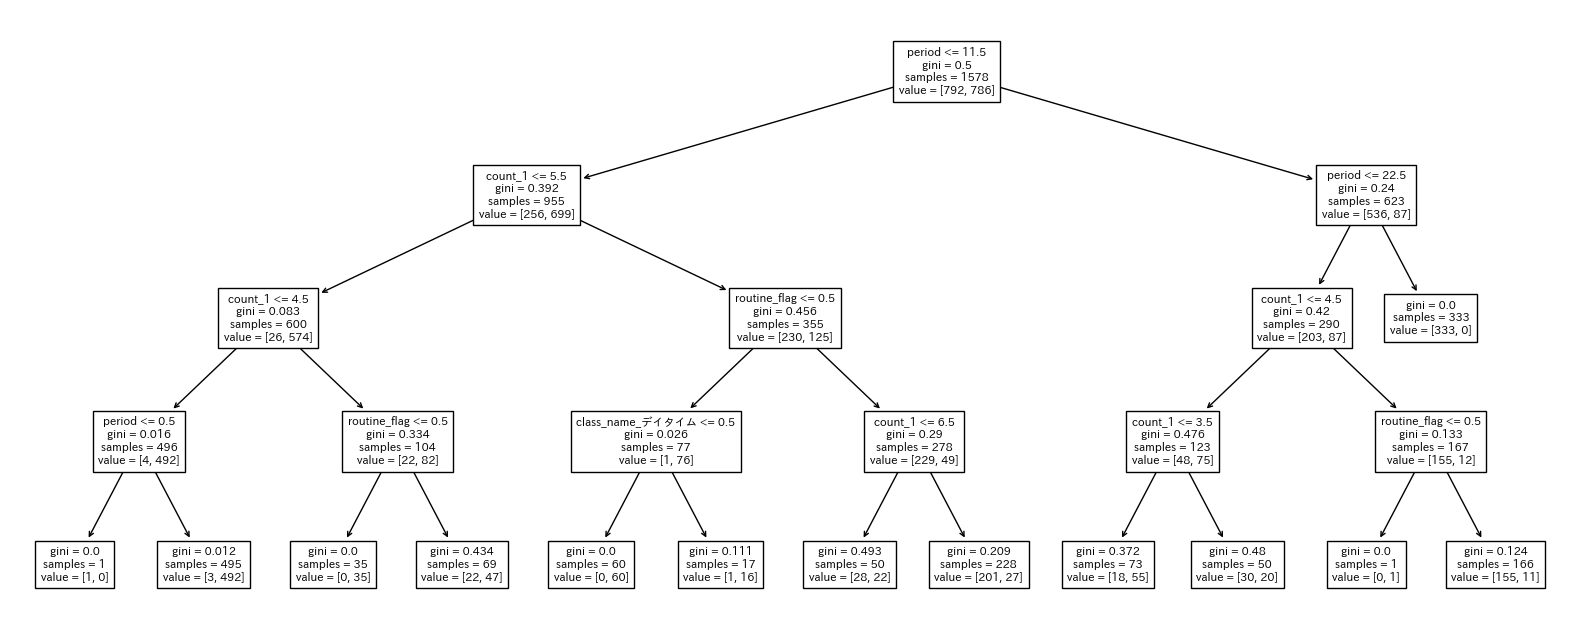

In [178]:
!pip install japanize_matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(model, feature_names=X.columns,fontsize=8)